# ASTR3110 Tutorial 2: Pandas

Tutorial 2 of the *'Data Science Techniques in Astrophysics'* course at Macquarie University.

## Learning outcomes from this tutorial

 * Understand the concept of a 'dataframe'
 * Learn how to read and write data into/out of a dataframe
 * Learn how to inspect and slice the tabular data
 * Practice common operations like adding columns and rows
 * Query a table using logical expressions.
 * Merge tables using join operations
 * Clean data of spurious entries.
 * Visualise the data in a table using common plots.

## Introduction  to Pandas

The *pandas* module ([https://pandas.pydata.org/](https://pandas.pydata.org/)) is an open-source python-based data manipulation tool that originated in the comercial world and is now an industry standard. It is conceptually similar to a Microsoft Excel spreadsheet: it allows the user to perform operations on tables of data. *Pandas* is very well documented and there are excellent tutorials available online:

 * [Online Documentation](https://pandas.pydata.org/docs/)
 * [Official 'Getting Started' Guide](https://pandas.pydata.org/docs/user_guide/10min.html#min)
 * [Pandas Cheat Sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)

## Setup for Google Drive

Today we will be operating on actual data, so we need to start by linking to our Google drive. If you are running this notebook on a local machine you can safely ignore this section.

Open the [SETUP_COLAB](https://github.com/MQ-ASTR3110/ASTR3110_Tutorial_Notebooks_2022/blob/master/SETUP_COLAB.md) instructions in a new tab and copy the material to your Google drive. Go to drive.google.com, find the notebook 'ASTR3110_Tutorial_2_Pandas.ipynb' and open using Colab. Then make sure Google drive is mounted using the following code:

In [158]:
# Uncomment to mount your Google Drive space (IGNORE IF RUNNING LOCALLY)
#from google.colab import drive
#drive.mount('/content/gdrive')

In [159]:
# Get into the correct directory
#cd gdrive/'My Drive'
#BE SURE TO GO TO THE FOLDER THAT HAS THE GITHUB REPOSITORY

## Reading in data

The data we will be processing today is a catalogue of radio-bright objects detected by the Very Large Array. It consists of several different types of objects: HII Regions (ionised bubbles around high-mass stars), Planetary Nebulae (an end-phase of stellar evolution), Radio Stars (stars that have radio flares) and Radio Galaxies (black-holes in galaxies outside our own Milky Way). 

The data has been downloaded from the [project website](https://cornish.leeds.ac.uk/public/catalogue.php) as comma separated variables (CSV) files and is split into several parts.

* DATA/CORNISH_HII.csv
* DATA/CORNISH_PN.csv
* DATA/CORNISH_STAR.csv
* DATA/CORNISH_RG.csv

Let's load each of these files into a pandas dataframe:

In [1]:
import pandas as pd

# Pandas has an inbuild CSV reader
hiiDF = pd.read_csv("DATA/CORNISH_HII.csv", comment="#")
print("The size of the HII table (rows, cols) =", hiiDF.shape)

The size of the HII table (rows, cols) = (288, 33)


In [2]:
# We can also display the first few lines
hiiDF.head()
#compare the below to the text version using emacs. Can see that it looks a lot like an excel spreadsheet,
#but within the python environment there is a lot more scope to manipulate the data when compared with excel, which 
#I find rather clunky.

,Name,l_deg,b_deg,RA_deg,Dec_deg,dRA_asec,dDec_asec,Peak_mJybm,dPeak_mJybm,Flux_mJy,...,mType,fArtefact,fCluster,fEdge,fHiNoise,fHi5Sig,fNearBright,fSmoothWeighting,fOverlap7sig,fOverlap5sig
0,G010.3009-00.1477,10.30088,-0.14770,272.23311,-20.09871,0.14,0.14,56.37,5.04,631.39,...,P,0,1,0,1,1,0,1,0,0
1,G010.3204-00.2328,10.32038,-0.23281,272.32303,-20.12308,1.09,1.08,8.02,0.84,32.43,...,P,0,0,0,1,0,0,1,0,0
2,G010.3204-00.2586,10.32042,-0.25857,272.34701,-20.13525,0.11,0.12,14.61,1.50,18.20,...,G,0,0,0,1,0,0,0,0,0
3,G010.4624+00.0343,10.46241,0.03427,272.14759,-19.86931,0.19,0.18,27.11,2.42,215.39,...,P,0,0,0,0,1,0,0,0,0
4,G010.4724+00.0275,10.47236,0.02750,272.15907,-19.86382,0.56,0.54,22.34,2.01,38.43,...,P,0,1,0,0,1,0,0,1,0


In [3]:
# Print all the column names and data types
# Pandas guesses the relevant type from the format of the data.
#Float64 is a double-precision floating point value. Means the numerical 
#values are represented accurately to 16 decimal points. Takes up 64bits of memory on your computer.
#Float32 is single precision -- 8 decimal points, 32bits.
#object is a string or mixture of string and numerical values (as we have here), int64 are integers.
print(hiiDF.dtypes)

Name                   object
l_deg                 float64
b_deg                 float64
RA_deg                float64
Dec_deg               float64
dRA_asec              float64
dDec_asec             float64
Peak_mJybm            float64
dPeak_mJybm           float64
Flux_mJy              float64
dFlux_mJy             float64
Angscale_asec         float64
dAngscale_asec        float64
AngscaleDecon_asec    float64
gaussMajor_asec       float64
dGaussMajor_asec      float64
gaussMinor_asec       float64
dGaussMminor_asec     float64
gaussPosangle_deg     float64
dGaussPosangle_deg    float64
RMS_mJybm             float64
Sky_mJybm             float64
Sigma                 float64
mType                  object
fArtefact               int64
fCluster                int64
fEdge                   int64
fHiNoise                int64
fHi5Sig                 int64
fNearBright             int64
fSmoothWeighting        int64
fOverlap7sig            int64
fOverlap5sig            int64
dtype: obj

In [4]:
#Good idea to check your data types to see if they make sense. You can easily convert
#between data types with Pandas. For example:
print('Original: ')
print(hiiDF['l_deg'])
print('Convert to Integer: ')
print(hiiDF['l_deg'].astype('int64'))

Original: 
0      10.30088
1      10.32038
2      10.32042
3      10.46241
4      10.47236
         ...   
283    61.47576
284    61.47631
285    61.47701
286    61.72069
287    64.13101
Name: l_deg, Length: 288, dtype: float64
Convert to Integer: 
0      10
1      10
2      10
3      10
4      10
       ..
283    61
284    61
285    61
286    61
287    64
Name: l_deg, Length: 288, dtype: int64


All the other files have identical column names so we want to add a new column that contains an identifier for object type:

In [5]:
# Create a new column with the name 'objectType'
# and set all values to 'HII'
hiiDF["objectType"] = "HII"#this fills all 288 rows in new column with "HII"
hiiDF.head()

,Name,l_deg,b_deg,RA_deg,Dec_deg,dRA_asec,dDec_asec,Peak_mJybm,dPeak_mJybm,Flux_mJy,...,fArtefact,fCluster,fEdge,fHiNoise,fHi5Sig,fNearBright,fSmoothWeighting,fOverlap7sig,fOverlap5sig,objectType
0,G010.3009-00.1477,10.30088,-0.14770,272.23311,-20.09871,0.14,0.14,56.37,5.04,631.39,...,0,1,0,1,1,0,1,0,0,HII
1,G010.3204-00.2328,10.32038,-0.23281,272.32303,-20.12308,1.09,1.08,8.02,0.84,32.43,...,0,0,0,1,0,0,1,0,0,HII
2,G010.3204-00.2586,10.32042,-0.25857,272.34701,-20.13525,0.11,0.12,14.61,1.50,18.20,...,0,0,0,1,0,0,0,0,0,HII
3,G010.4624+00.0343,10.46241,0.03427,272.14759,-19.86931,0.19,0.18,27.11,2.42,215.39,...,0,0,0,0,1,0,0,0,0,HII
4,G010.4724+00.0275,10.47236,0.02750,272.15907,-19.86382,0.56,0.54,22.34,2.01,38.43,...,0,1,0,0,1,0,0,1,0,HII


In [6]:
# to remove a column:
hiiDF.pop("objectType")
hiiDF.head()


,Name,l_deg,b_deg,RA_deg,Dec_deg,dRA_asec,dDec_asec,Peak_mJybm,dPeak_mJybm,Flux_mJy,...,mType,fArtefact,fCluster,fEdge,fHiNoise,fHi5Sig,fNearBright,fSmoothWeighting,fOverlap7sig,fOverlap5sig
0,G010.3009-00.1477,10.30088,-0.14770,272.23311,-20.09871,0.14,0.14,56.37,5.04,631.39,...,P,0,1,0,1,1,0,1,0,0
1,G010.3204-00.2328,10.32038,-0.23281,272.32303,-20.12308,1.09,1.08,8.02,0.84,32.43,...,P,0,0,0,1,0,0,1,0,0
2,G010.3204-00.2586,10.32042,-0.25857,272.34701,-20.13525,0.11,0.12,14.61,1.50,18.20,...,G,0,0,0,1,0,0,0,0,0
3,G010.4624+00.0343,10.46241,0.03427,272.14759,-19.86931,0.19,0.18,27.11,2.42,215.39,...,P,0,0,0,0,1,0,0,0,0
4,G010.4724+00.0275,10.47236,0.02750,272.15907,-19.86382,0.56,0.54,22.34,2.01,38.43,...,P,0,1,0,0,1,0,0,1,0


In [7]:
#don't forget to readd objectType!
hiiDF["objectType"] = "HII"

In [8]:
#We can also write a few selected columns to a new csv file:
hiiDF.to_csv('new.csv',columns=['Name','l_deg','b_deg'],index=False)
#index=False does not write the index to the new file...
#You can look at your new csv file in your directory to check everything makes sense. Use excel if you must...

Load the remaining catalogue files:

In [9]:
# Load the PNs
pnDF = pd.read_csv("DATA/CORNISH_PN.csv", comment="#")
pnDF["objectType"] = "PN"
print("The size of the PN table (rows, cols) =", pnDF.shape)

# Load the STARs
starDF = pd.read_csv("DATA/CORNISH_STAR.csv", comment="#")
starDF["objectType"] = "STAR"
print("The size of the STAR table (rows, cols) =", starDF.shape)

# Load the Radio Galaxies
rgDF = pd.read_csv("DATA/CORNISH_RG.csv", comment="#")
rgDF["objectType"] = "RG"
print("The size of the RG table (rows, cols) =", rgDF.shape)

The size of the PN table (rows, cols) = (170, 34)
The size of the STAR table (rows, cols) = (130, 34)
The size of the RG table (rows, cols) = (418, 34)


## Massaging the catalogue tables

Because the tables have exactly the same columns, we can concatenate them into a master catalogue:

In [10]:
# Use the concat() function and supply a 
allDF = pd.concat([hiiDF, pnDF, starDF, rgDF])
print("The size of the full catalogue table (rows, cols) =", allDF.shape)

The size of the full catalogue table (rows, cols) = (1006, 34)


### Indexing

The tables are simply stacked on top of each other, maintaining the same order as when they were read in. We might want to order them by coordinate in the Galactic reference frame (longitude and latitude):

In [11]:
# Sort the rows by Galactic coordinates. 
#inplace=True means that the allDF dataframe will be overwritten with the
#sorted data frame. Normally you'd sort by one of the columns in the data frame only. 
#However, in cases where there are non-unique values in the sorted column, a second column
#can be used.
allDF.sort_values(by=["l_deg", "b_deg"], inplace=True, ascending=True)
allDF

,Name,l_deg,b_deg,RA_deg,Dec_deg,dRA_asec,dDec_asec,Peak_mJybm,dPeak_mJybm,Flux_mJy,...,fArtefact,fCluster,fEdge,fHiNoise,fHi5Sig,fNearBright,fSmoothWeighting,fOverlap7sig,fOverlap5sig,objectType
0,G009.9702-00.5292,9.97016,-0.52920,272.41889,-20.57271,0.12,0.13,6.99,0.74,12.63,...,0,0,0,0,0,0,0,0,0,PN
0,G010.0500-00.6863,10.04996,-0.68627,272.60697,-20.57849,1.71,1.68,5.19,0.53,12.24,...,0,0,0,0,0,0,0,0,0,RG
1,G010.0989+00.7393,10.09889,0.73927,271.30448,-19.84291,0.12,0.12,64.96,5.79,475.99,...,0,0,0,0,0,0,0,0,0,PN
1,G010.1232-00.9590,10.12318,-0.95903,272.90001,-20.64600,0.10,0.10,15.42,1.42,22.61,...,0,1,0,0,0,0,0,0,0,RG
2,G010.1237-00.9564,10.12369,-0.95637,272.89778,-20.64427,0.11,0.11,8.78,0.86,9.88,...,0,1,0,0,0,0,0,0,0,RG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414,G065.2147-00.8903,65.21471,-0.89028,299.79119,27.91745,0.17,0.17,1.29,0.21,1.29,...,0,1,0,0,0,0,0,0,0,RG
415,G065.2164-00.8911,65.21645,-0.89111,299.79303,27.91849,0.16,0.16,1.50,0.22,1.69,...,0,1,0,0,0,0,0,0,0,RG
129,G065.2462+00.3505,65.24617,0.35051,298.60673,28.58976,0.11,0.11,4.57,0.48,4.57,...,0,0,0,0,1,0,0,0,0,STAR
416,G065.3209+00.2325,65.32087,0.23250,298.76581,28.59278,0.37,0.33,8.46,0.77,55.57,...,0,1,0,0,0,0,0,1,0,RG


Note here that the leftmost numbers above are actually an index for the table. Currently these numbers derive from the line number that the rows occupied in their original CSV file. This may become confusing later on should we choose to use the index column to select out rows of interest. We can do several things to fix this:

In [12]:
# 1) Reset the index to a numeric value
# setting drop=True removes the old index (see below explanation too)
allDF.reset_index(drop=True, inplace=True)
allDF

,Name,l_deg,b_deg,RA_deg,Dec_deg,dRA_asec,dDec_asec,Peak_mJybm,dPeak_mJybm,Flux_mJy,...,fArtefact,fCluster,fEdge,fHiNoise,fHi5Sig,fNearBright,fSmoothWeighting,fOverlap7sig,fOverlap5sig,objectType
0,G009.9702-00.5292,9.97016,-0.52920,272.41889,-20.57271,0.12,0.13,6.99,0.74,12.63,...,0,0,0,0,0,0,0,0,0,PN
1,G010.0500-00.6863,10.04996,-0.68627,272.60697,-20.57849,1.71,1.68,5.19,0.53,12.24,...,0,0,0,0,0,0,0,0,0,RG
2,G010.0989+00.7393,10.09889,0.73927,271.30448,-19.84291,0.12,0.12,64.96,5.79,475.99,...,0,0,0,0,0,0,0,0,0,PN
3,G010.1232-00.9590,10.12318,-0.95903,272.90001,-20.64600,0.10,0.10,15.42,1.42,22.61,...,0,1,0,0,0,0,0,0,0,RG
4,G010.1237-00.9564,10.12369,-0.95637,272.89778,-20.64427,0.11,0.11,8.78,0.86,9.88,...,0,1,0,0,0,0,0,0,0,RG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001,G065.2147-00.8903,65.21471,-0.89028,299.79119,27.91745,0.17,0.17,1.29,0.21,1.29,...,0,1,0,0,0,0,0,0,0,RG
1002,G065.2164-00.8911,65.21645,-0.89111,299.79303,27.91849,0.16,0.16,1.50,0.22,1.69,...,0,1,0,0,0,0,0,0,0,RG
1003,G065.2462+00.3505,65.24617,0.35051,298.60673,28.58976,0.11,0.11,4.57,0.48,4.57,...,0,0,0,0,1,0,0,0,0,STAR
1004,G065.3209+00.2325,65.32087,0.23250,298.76581,28.59278,0.37,0.33,8.46,0.77,55.57,...,0,1,0,0,0,0,0,1,0,RG


In [13]:
# 2) Set the unique 'Name' column to the index
#Note that this overwrites the numerical index set in the above cell
allDF.set_index(["Name"], drop=False, inplace=True)
allDF

,Name,l_deg,b_deg,RA_deg,Dec_deg,dRA_asec,dDec_asec,Peak_mJybm,dPeak_mJybm,Flux_mJy,...,fArtefact,fCluster,fEdge,fHiNoise,fHi5Sig,fNearBright,fSmoothWeighting,fOverlap7sig,fOverlap5sig,objectType
Name,,,,,,,,,,,,,,,,,,,,,
G009.9702-00.5292,G009.9702-00.5292,9.97016,-0.52920,272.41889,-20.57271,0.12,0.13,6.99,0.74,12.63,...,0,0,0,0,0,0,0,0,0,PN
G010.0500-00.6863,G010.0500-00.6863,10.04996,-0.68627,272.60697,-20.57849,1.71,1.68,5.19,0.53,12.24,...,0,0,0,0,0,0,0,0,0,RG
G010.0989+00.7393,G010.0989+00.7393,10.09889,0.73927,271.30448,-19.84291,0.12,0.12,64.96,5.79,475.99,...,0,0,0,0,0,0,0,0,0,PN
G010.1232-00.9590,G010.1232-00.9590,10.12318,-0.95903,272.90001,-20.64600,0.10,0.10,15.42,1.42,22.61,...,0,1,0,0,0,0,0,0,0,RG
G010.1237-00.9564,G010.1237-00.9564,10.12369,-0.95637,272.89778,-20.64427,0.11,0.11,8.78,0.86,9.88,...,0,1,0,0,0,0,0,0,0,RG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
G065.2147-00.8903,G065.2147-00.8903,65.21471,-0.89028,299.79119,27.91745,0.17,0.17,1.29,0.21,1.29,...,0,1,0,0,0,0,0,0,0,RG
G065.2164-00.8911,G065.2164-00.8911,65.21645,-0.89111,299.79303,27.91849,0.16,0.16,1.50,0.22,1.69,...,0,1,0,0,0,0,0,0,0,RG
G065.2462+00.3505,G065.2462+00.3505,65.24617,0.35051,298.60673,28.58976,0.11,0.11,4.57,0.48,4.57,...,0,0,0,0,1,0,0,0,0,STAR


Here we have retained the 'Name' column by specifying ```drop=False``` - by default it is dropped'. Had we dropped it, we could add it back in later by executing ```allDF["Name"]=allDF.index```.

### Summary stats and missing data

The are lots of convenience methods in Pandas dataframe objects. For example, the ```dataframe.describe()``` returns a dataframe with summary statistics of each column:

In [14]:
# Calculate summary statistics
summaryDF = allDF.describe()
summaryDF


,l_deg,b_deg,RA_deg,Dec_deg,dRA_asec,dDec_asec,Peak_mJybm,dPeak_mJybm,Flux_mJy,dFlux_mJy,...,Sigma,fArtefact,fCluster,fEdge,fHiNoise,fHi5Sig,fNearBright,fSmoothWeighting,fOverlap7sig,fOverlap5sig
count,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,...,1006.000000,1006.0,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000
mean,36.790826,-0.008792,284.761851,3.394871,0.298678,0.299066,21.577972,2.013091,120.367147,11.934801,...,53.329920,0.0,0.378728,0.011928,0.138171,0.163022,0.002982,0.109344,0.216700,0.036779
std,16.008604,0.567249,7.653575,14.162320,0.393068,0.391821,48.460278,4.297175,571.829061,51.526880,...,124.057847,0.0,0.485311,0.108618,0.345251,0.369569,0.054554,0.312225,0.412201,0.188313
min,9.970160,-1.154330,271.276440,-20.646000,0.100000,0.100000,1.290000,0.180000,1.290000,0.360000,...,7.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.698670,-0.393413,278.535605,-8.376655,0.110000,0.110000,3.745000,0.462500,6.815000,1.050000,...,10.500000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,36.056800,0.000135,283.985750,2.944290,0.150000,0.150000,7.110000,0.725000,16.025000,1.975000,...,19.600000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,50.271007,0.390903,290.977650,15.516255,0.257500,0.260000,17.790000,1.640000,51.140000,5.920000,...,45.900000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,65.323130,1.175300,299.793030,28.594370,3.210000,3.320000,701.800000,62.460000,12616.400000,1120.830000,...,2372.700000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We can access the rows by their index:

In [15]:
# Access the 'mean' row and print
print("The mean row is {}".format(summaryDF.loc["mean"]))

The mean row is l_deg                  36.790826
b_deg                  -0.008792
RA_deg                284.761851
Dec_deg                 3.394871
dRA_asec                0.298678
dDec_asec               0.299066
Peak_mJybm             21.577972
dPeak_mJybm             2.013091
Flux_mJy              120.367147
dFlux_mJy              11.934801
Angscale_asec           3.187865
dAngscale_asec          0.080858
AngscaleDecon_asec      3.769572
gaussMajor_asec         2.078572
dGaussMajor_asec        0.188232
gaussMinor_asec         1.750382
dGaussMminor_asec       0.134625
gaussPosangle_deg      87.695335
dGaussPosangle_deg     30.516525
RMS_mJybm               0.421083
Sky_mJybm              -0.006173
Sigma                  53.329920
fArtefact               0.000000
fCluster                0.378728
fEdge                   0.011928
fHiNoise                0.138171
fHi5Sig                 0.163022
fNearBright             0.002982
fSmoothWeighting        0.109344
fOverlap7sig            0.2

Note that when accessing a single row or column, the result is returned as a *Pandas series*. A Pandas series is a much simpler data format compared to a dataframe. In fact, a dataframe can be thought of as several Pandas series joined together! 

In [16]:
# Access the 'Flux_mJy' value in the 'mean' row. 
print("The mean value for radio flux is {:.2f} mJy".format(summaryDF.loc["mean", "Flux_mJy"]))
#Note the formatting in the curly bracket: the 2 after the decimal 
#tells python to print only two digits there. Can, e.g., change to 4 to show more values after the decimal point etc.

The mean value for radio flux is 120.37 mJy


Here we use the important ```.loc()``` method to address a row by its index value. We could also specify its row number using the ```.iloc()``` method:

In [17]:
# Access the standard deviation on the 'Flux_mJy' value in the 3rd row
# Remember, python is zero-indexed.
print("The standard deviation on the radio flux is {:.2f} mJy".format(summaryDF.iloc[2]["Flux_mJy"]))

The standard deviation on the radio flux is 571.83 mJy


In [21]:
# Or access the whole 100th row of the catalogue
allDF.iloc[99]

Name                  G015.4857+00.3403
l_deg                          15.48566
b_deg                           0.34028
RA_deg                        274.39381
Dec_deg                       -15.31394
dRA_asec                           0.78
dDec_asec                          0.72
Peak_mJybm                         6.25
dPeak_mJybm                        0.58
Flux_mJy                          20.18
dFlux_mJy                          2.34
Angscale_asec                     4.753
dAngscale_asec                    0.044
AngscaleDecon_asec                  4.5
gaussMajor_asec                     NaN
dGaussMajor_asec                    NaN
gaussMinor_asec                     NaN
dGaussMminor_asec                   NaN
gaussPosangle_deg                   NaN
dGaussPosangle_deg                  NaN
RMS_mJybm                          0.33
Sky_mJybm                        -0.009
Sigma                              18.3
mType                                 P
fArtefact                             0


In [23]:
#or by name
allDF.loc['G015.4857+00.3403']

Name                  G015.4857+00.3403
l_deg                          15.48566
b_deg                           0.34028
RA_deg                        274.39381
Dec_deg                       -15.31394
dRA_asec                           0.78
dDec_asec                          0.72
Peak_mJybm                         6.25
dPeak_mJybm                        0.58
Flux_mJy                          20.18
dFlux_mJy                          2.34
Angscale_asec                     4.753
dAngscale_asec                    0.044
AngscaleDecon_asec                  4.5
gaussMajor_asec                     NaN
dGaussMajor_asec                    NaN
gaussMinor_asec                     NaN
dGaussMminor_asec                   NaN
gaussPosangle_deg                   NaN
dGaussPosangle_deg                  NaN
RMS_mJybm                          0.33
Sky_mJybm                        -0.009
Sigma                              18.3
mType                                 P
fArtefact                             0


In [24]:
#We can also use groupby to group the data frame and determine properties of each individual grouping. 
#E.g., in our combined dataframe we have four obvious categories and we can determine properties of various
#columns of the different groupings individually:
print('Properties of galactic latitude per object type:') 
allDF.groupby('objectType')['b_deg'].describe()


Properties of galactic latitude per object type:


,count,mean,std,min,25%,50%,75%,max
objectType,,,,,,,,
HII,288.0,-0.018423,0.287612,-1.11120,-0.177218,0.000135,0.096888,1.04325
PN,170.0,0.004518,0.573538,-1.09925,-0.476885,-0.016120,0.460587,1.17179
RG,418.0,0.002141,0.683710,-1.15433,-0.662218,0.018325,0.572345,1.17530
STAR,130.0,-0.040019,0.615582,-1.10070,-0.549035,-0.035080,0.504997,1.04343


Many datasets will have missing data, which are set to NaN in a Pandas dataframe. To figure out where these are occuring do the following:

In [25]:
pd.options.mode.use_inf_as_na = True 
#there are many options that can be set in pandas. This particular 
#one tells Pandas to treat values set as INF, -INF, None, NaN are 
#all trated as NA. Here NA stands for "Not Available", or Null.
#this is a common way to represent missing data. The data may be missing
#because, for example, an attempt to fit a model to the data failed, and thus the 
#parameters are unreliable.
# Count the number of NULL or missing values in each column using "isnull" as follows:
allDF.isnull().sum()

Name                    0
l_deg                   0
b_deg                   0
RA_deg                  0
Dec_deg                 0
dRA_asec                0
dDec_asec               0
Peak_mJybm              0
dPeak_mJybm             0
Flux_mJy                0
dFlux_mJy               0
Angscale_asec           0
dAngscale_asec          0
AngscaleDecon_asec    398
gaussMajor_asec       368
dGaussMajor_asec      368
gaussMinor_asec       368
dGaussMminor_asec     368
gaussPosangle_deg     368
dGaussPosangle_deg    368
RMS_mJybm               0
Sky_mJybm               0
Sigma                   0
mType                   0
fArtefact               0
fCluster                0
fEdge                   0
fHiNoise                0
fHi5Sig                 0
fNearBright             0
fSmoothWeighting        0
fOverlap7sig            0
fOverlap5sig            0
objectType              0
dtype: int64

In [26]:
# Make a boolean mask to pick out NULL values
#A boolean mask is an array with the same size as as the 
#dataframe of interest, but filled with True or False depending on
#what is set in the mask, In this case, the mask will be "True" when
#the column named AngscaleDecon_asec is NaN, INF etc.

#AngscaleDecon_asec is the Deconvolved angular scale (for >1.8'' only) for an object. 
#That is, the instrumental PSF of the images has been quadrature subtracted from the measured Gaussian FWHM
mask = allDF["AngscaleDecon_asec"].isnull()
allDF[mask]["AngscaleDecon_asec"] #uncomment this one to show that this set of rows and columns really does contain NaNs.
#allDF[mask]

Name
G010.1237-00.9564   NaN
G010.3204-00.2586   NaN
G010.4168+00.9356   NaN
G011.0541+00.4864   NaN
G011.0548+00.4866   NaN
                     ..
G065.0035-00.0836   NaN
G065.1596-00.5956   NaN
G065.2147-00.8903   NaN
G065.2164-00.8911   NaN
G065.2462+00.3505   NaN
Name: AngscaleDecon_asec, Length: 398, dtype: float64

In [27]:
#now, if we want to remove all of the rows in our dataframe that contain NaNs for the AngscaleDecon_asec entry,
# we do the following:
cleanDF=allDF[~mask]
#Note the ~ (tilde). This inverts the mask, i.e., sets False to True and vice-versa.
print('Size of cleaned data set is',cleanDF.shape)
print('Size of dirty data set is',allDF.shape)
#alternatively, you can overwrite the original

#an alternative is to use drop_na. This gets rid of rows where *any* of the values are NaN!
veryCleanDF=allDF.dropna()
print('Size of very clean dropna data set is',veryCleanDF.shape)


Size of cleaned data set is (608, 34)
Size of dirty data set is (1006, 34)
Size of very clean dropna data set is (256, 34)


In [28]:
# First import the matplotlib pyplot and make plots appear in the browser
from matplotlib import pyplot as plt
%matplotlib inline

Text(0, 0.5, 'GLat (deg)')

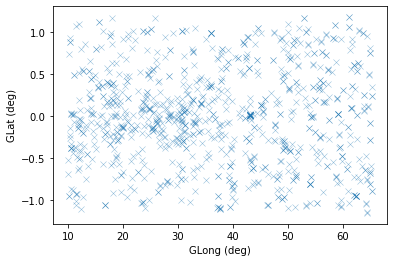

In [29]:
# We can plot directly using the MPL pyplot interface
# Here we plot the Galactic longitude and latitude of the data:
plt.scatter(allDF["l_deg"], allDF["b_deg"], marker="x", lw=0.5, alpha=0.5)
plt.xlabel("GLong (deg)")
plt.ylabel("GLat (deg)")


Text(0, 0.5, 'GLat (deg)')

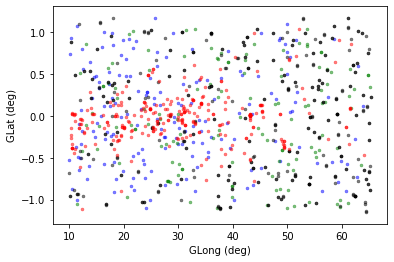

In [30]:
# We can plot directly using the MPL pyplot interface
# Here we plot the Galactic longitude and latitude of the data:
#this is the long-handed but error-prone way of doing it! When I do this sort of thing
#inevitably, I will forget to change one of the boolean selection masks and plot the wrong thing...
selPN=allDF["objectType"] == "PN"
plt.scatter(allDF[selPN]["l_deg"], allDF[selPN]["b_deg"], marker=".", lw=0.5, alpha=0.5,color='b')

selSTAR=allDF["objectType"] == "STAR"
plt.scatter(allDF[selSTAR]["l_deg"], allDF[selSTAR]["b_deg"], marker=".", lw=0.5, alpha=0.5,color='g')

#Maybe don't show all of these...
selRG=allDF["objectType"] == "RG"
plt.scatter(allDF[selRG]["l_deg"], allDF[selRG]["b_deg"], marker=".", lw=0.5, alpha=0.5,color='k')

selHII=allDF["objectType"] == "HII"
plt.scatter(allDF[selHII]["l_deg"], allDF[selHII]["b_deg"], marker=".", lw=0.5, alpha=0.5,color='r')

plt.xlabel("GLong (deg)")
plt.ylabel("GLat (deg)")

Text(0, 0.5, 'GLat (deg)')

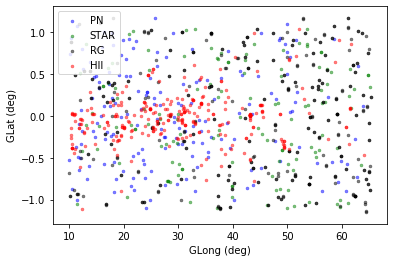

In [31]:
# Alternatively, its better practice to make a function for repetitive tasks.
# Also good practice to include a legend when using symbols with multiple 
#colours/shapes, which is easy to do in matplotlib
def plot_objs(DF,objType,color):
    selOBJ=DF["objectType"] == objType
    plt.scatter(allDF[selOBJ]["l_deg"], allDF[selOBJ]["b_deg"], marker=".", lw=0.5, alpha=0.5,color=color,label=objType)

plot_objs(allDF,"PN","b")
plot_objs(allDF,"STAR","g")
plot_objs(allDF,"RG","k")
plot_objs(allDF,"HII","r")

plt.legend()
plt.xlabel("GLong (deg)")
plt.ylabel("GLat (deg)")

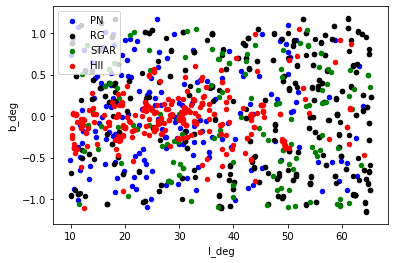

In [32]:
#Even more simply, this can be done with inbuilt functionality in pandas!

ax=allDF[selPN].plot.scatter(x="l_deg",y="b_deg",c='b')#,ax=ax)
allDF[selRG].plot.scatter(x="l_deg",y="b_deg",c='k',ax=ax)
allDF[selSTAR].plot.scatter(x="l_deg",y="b_deg",c='g',ax=ax)
allDF[selHII].plot.scatter(x="l_deg",y="b_deg",c='r',ax=ax)
ax.legend(["PN","RG","STAR","HII"])